In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)


# Bitcoin Price History and Regression Models

### Add Clean Data for Bitcoin

In [57]:
dfBTC = pd.read_csv (r'..\Data\crypto\bitcoinAll_1HR_Cleaned.csv')

In [58]:
dfBTC.head(5)

,Unnamed: 0,rate_open,rate_high,rate_low,rate_close,Date,hour,year,month,day
0,0,432.039880,432.079724,430.174245,430.831630,2016-01-01,0,2016,1,1
1,1,430.821040,431.181942,429.670276,430.378803,2016-01-01,1,2016,1,1
2,2,430.383656,431.237817,430.325129,430.608821,2016-01-01,2,2016,1,1
3,3,430.594263,432.903554,430.330866,432.903554,2016-01-01,3,2016,1,1
4,4,433.020607,436.372214,432.770797,435.602850,2016-01-01,4,2016,1,1


### Scatter Plot of Bitcoin prices from January 2016

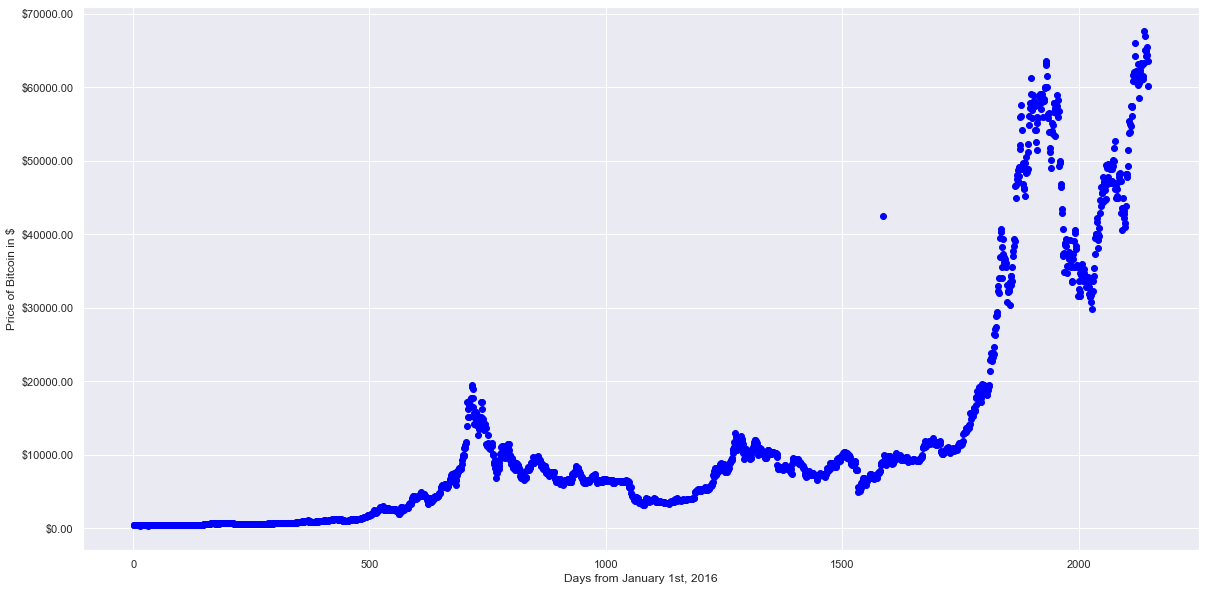

In [79]:

x = list(range(1,2148))

dfDaily = dfBTC[dfBTC['hour'] == 23]

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Bitcoin in $')

ax.scatter(x, dfDaily['rate_close'], c = 'blue')

## Linear Regression

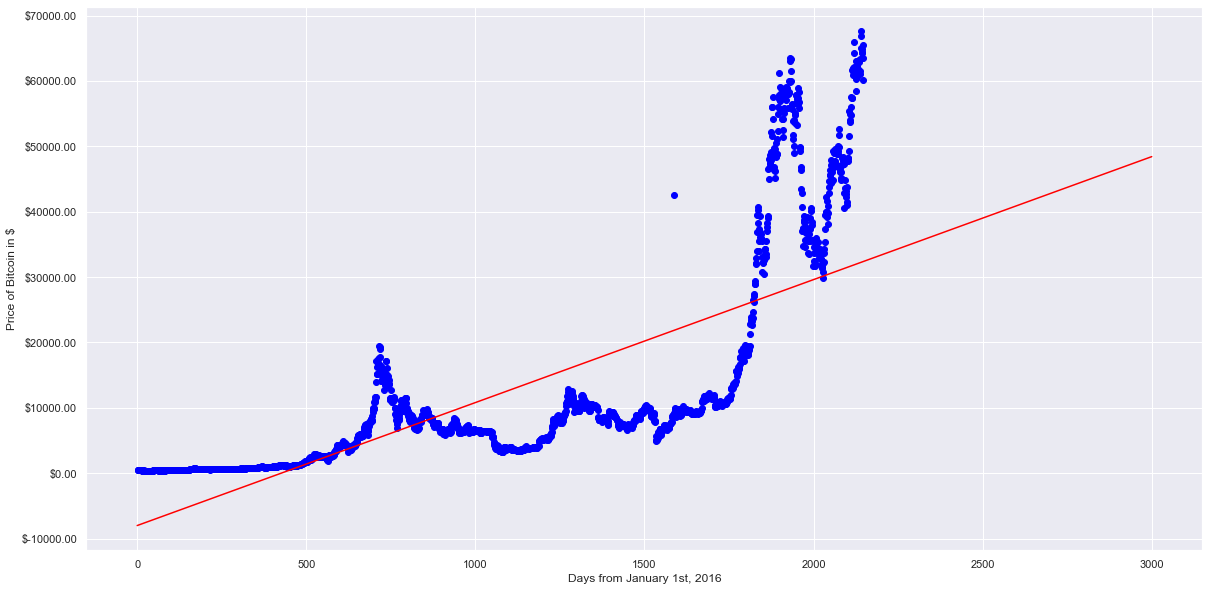

In [80]:
model1 = LinearRegression()

x = np.array(x)
y = np.array(dfDaily['rate_close'])

model1.fit(x[:, np.newaxis],y )

xfit = np.linspace(0, 3000, 3000)
yfit = model1.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Bitcoin in $')
ax.scatter(x, y, c = 'blue')
ax.plot(xfit, yfit, c = 'red');

## Exponential Regression

y = 2^6.4043935888563635 * 2^(0.0020521621030495075x)


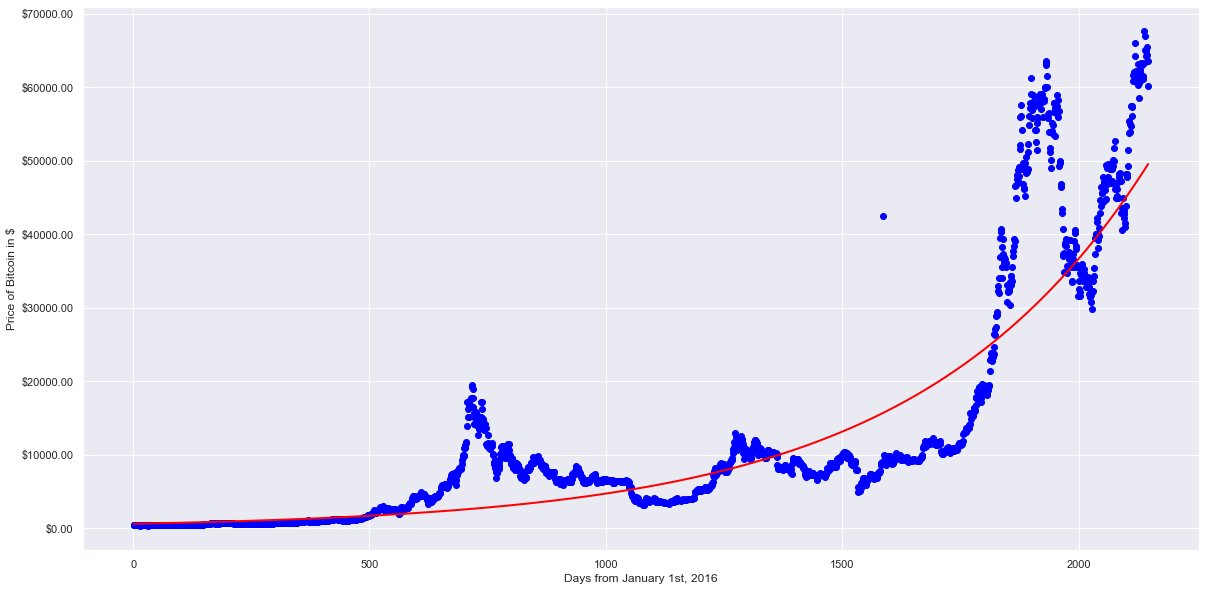

In [73]:

y_data = np.array(dfDaily['rate_close'])

log_x = np.log(x)
log_y = np.log(y_data)

curve_fit = np.polyfit(x, log_y, 1)
print("y = 2^{fit1} * 2^({fit2}x)".format( fit1 = curve_fit[1], fit2 =  curve_fit[0]))
y = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*x)

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Bitcoin in $')
ax.scatter(x, y_data, c = 'blue')
ax.plot(x, y, c = 'red', linewidth = 2);

## Linear Regression with Prediction

Coefficient:   19.0125850672456
Mean squared error: 95677199.01
R-squared: 0.57


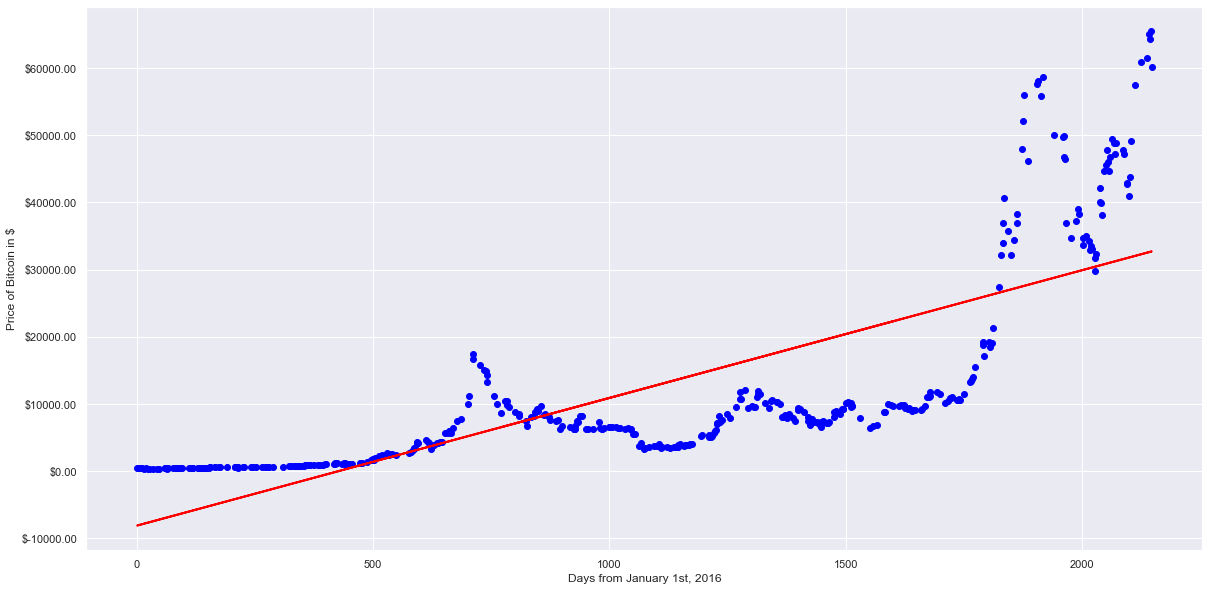

In [77]:
X_train, X_test , y_train, y_test = train_test_split(x[:, np.newaxis], y_data, train_size=0.80)

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)


print("Coefficient:  ", model1.coef_[0])
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('R-squared: %.2f' % r2_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20,10))
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


ax.set_xlabel('Days from January 1st, 2016')
ax.set_ylabel('Price of Bitcoin in $')
ax.scatter(X_test, y_test,  color='blue')
ax.plot(X_test, y_pred, color='red', linewidth=2);
